## Calculating coordination numbers

In this example, we will read in a snapshot from an MD simulation and then calculate the coordination number distribution.  
This example assumes that you read the basic example.

In [1]:
import pybop.core as pc
import numpy as np
import matplotlib.pyplot as plt

### Read in a file

In [2]:
sys = pc.System()
sys.read_inputfile('conf.dump')

### Calculating neighbors

We start by calculating the neighbors of each atom in the system. There are two ways to do this, using a cutoff method and using a voronoi polyhedra method.  
We will try with both of them. First we try with cutoff system.

#### Cutoff method

Cutoff method takes cutoff distance value and finds all atoms within the cutoff distance of the host atom.

In [39]:
sys.get_allneighbors(method='cutoff', cutoff=3.6)

Now lets get all the atoms.

In [40]:
atoms = sys.get_allatoms()

lets try accessing the coordination number of an atom

In [13]:
atoms[0].get_coordination()

12

We can loop over all atoms and create a histogram of the results 

In [41]:
coord = [atom.get_coordination() for atom in atoms]

Now lets plot and see the results

Text(0.5,1,'Cutoff method')

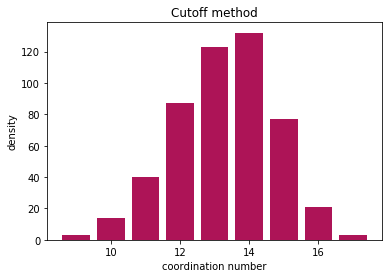

In [42]:
nos, counts = np.unique(coord, return_counts=True)
plt.bar(nos, counts, color="#AD1457")
plt.ylabel("density")
plt.xlabel("coordination number")
plt.title("Cutoff method")

Now finally we can compare with the voronoi method

### Voronoi method

Voronoi method calculates the voronoi polyhedra of all atoms. Any atom that shares a voronoi face area with the host atom are considered neighbors.  
Voronoi polyhedra is calculated using the Voro++ code. However, you dont need to install this specifically as it is linked to pybop.

> Attention! before running the neighbor calculation again, we have to reset the neighbors

In [38]:
sys.reset_allneighbors()

In [31]:
sys.get_allneighbors(method='voronoi')

Once again, lets get all atoms and find their coordination

In [32]:
atoms = sys.get_allatoms()
coord = [atom.get_coordination() for atom in atoms]

And visualise the results

Text(0.5,1,'Voronoi method')

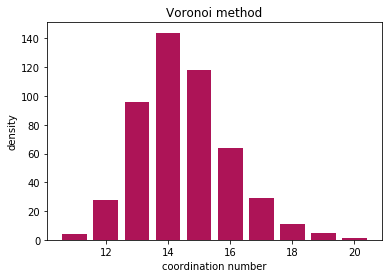

In [33]:
nos, counts = np.unique(coord, return_counts=True)
plt.bar(nos, counts, color="#AD1457")
plt.ylabel("density")
plt.xlabel("coordination number")
plt.title("Voronoi method")

### Finally..

Both methods find the coordination number, and the results are comparable. Cutoff method is very sensitive to the choice of cutoff radius, but voronoi method can slightly overestimate the neighbors due to thermal vibrations. 